In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [7]:

def build_dataset(words):
    block_size = 3
    X,Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X  = torch.tensor(X)
    Y  = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8* len(words))
n2 = int(0.9* len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [23]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [64]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
w1 = torch.randn((30,200), generator=g)
b1 = torch.randn(200, generator=g)
w2 = torch.randn((200,27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, w1, b1, w2, b2]

In [65]:
sum(p.nelement() for p in parameters)

11897

In [66]:
for p in parameters:
    p.requires_grad = True

In [67]:
stepi = []
lossi = []

In [68]:

for i in range(200000):
    
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,30) @ w1 + b1)
    logits = h @ w2 + b2 
    loss = F.cross_entropy(logits, Ytr[ix])
    
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())

1.9378011226654053


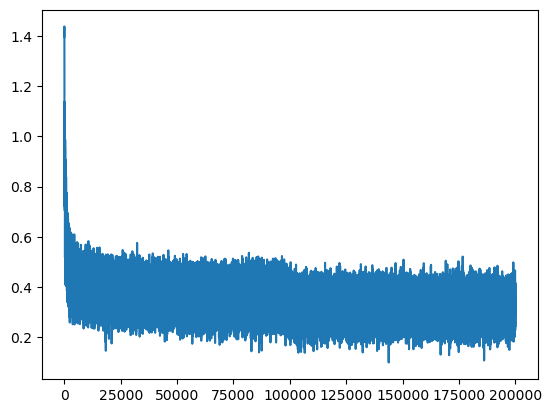

In [69]:
plt.plot(stepi, lossi) 

In [70]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ w1 + b1)
logits = h@ w2 + b2 
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1677, grad_fn=<NllLossBackward0>)

In [71]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ w1 + b1)
logits = h@ w2 + b2 
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1303, grad_fn=<NllLossBackward0>)

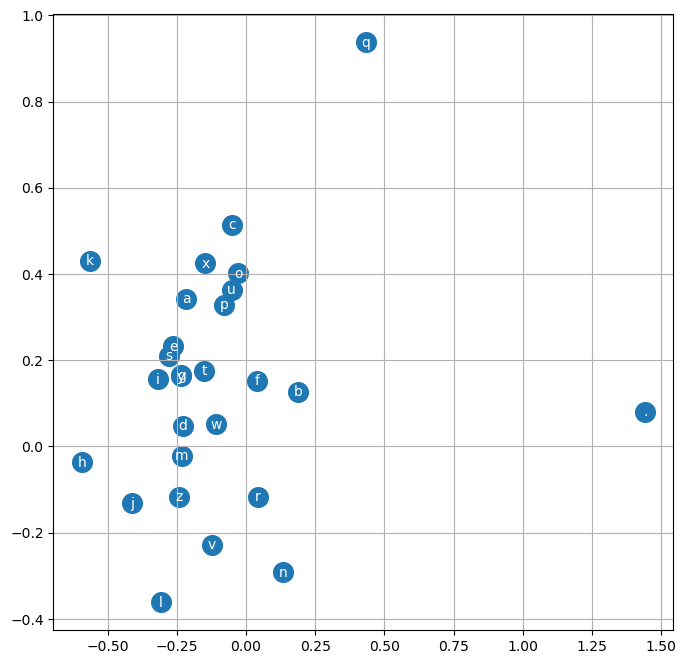

In [63]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [73]:
g = torch.Generator().manual_seed(2147483647+10)
block_size = 3
for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1) @ w1 + b1)
        logits = h @ w2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print(''.join(itos[i] for i in out))

mora.
mayah.
seel.
nihah.
lorethrusendraege.
zeredieliighmi.
jenleigh.
sananarielleigh.
kalin.
shubergahiriel.
kindreeller.
nochlyn.
breyce.
ryyah.
fiel.
yuma.
myshouda.
hil.
salynn.
ufrankelleusef.
